#### 1.	Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).
Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [3]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [4]:
a = np.mean(y) - b*np.mean(X)
a

444.1773573243596

In [5]:
y_hat = a + b*X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [6]:
# Функция потерь
n = len(y)
mse = ((y - y_hat)**2).sum()/n
mse

6470.414201176658

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

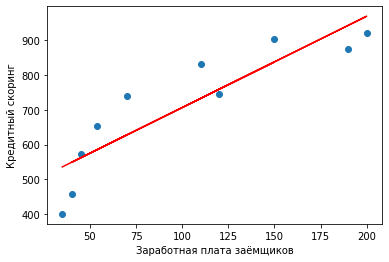

In [8]:
plt.scatter(X,y)
plt.plot(X,a+b*X,color='red')
plt.ylabel('Кредитный скоринг', rotation = 'vertical')
plt.xlabel('Заработная плата заёмщиков')
plt.show()

In [9]:
xy = X * y
b = xy.mean() / (X*X).mean() # без использования intercept
b

5.889820420132688

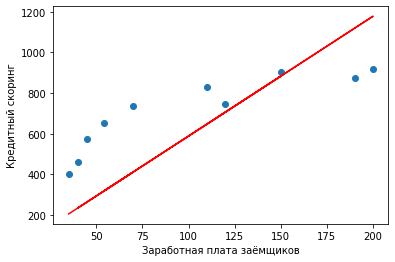

In [10]:
plt.scatter(X,y)
plt.plot(X,b*X,color='red')
plt.ylabel('Кредитный скоринг', rotation = 'vertical')
plt.xlabel('Заработная плата заёмщиков')
plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [11]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape(1,-1)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]).reshape(1,-1)
n = X.shape[1]

In [12]:
alpha = 0.00005
b = 0.1

for i in range(100000):
    y_pred = b * X
    b -= alpha * 2/n * np.sum((y_pred-y)*X)
b

5.889820420132689

#### 3.	В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица Лапласа используется, когда требуется подсчитать значение функции распределения нормальной случайной величины в точке и нам известны харакетиристики распредления выборки. Дано среднеквадратичное отклонение.   

Условия использования коэффициента Стьюдента:   
 - Не известны харакетиристики распредления выборки
 - Исследуемые данные подчиняются нормальному закону распределения   
 - Равенство дисперсий (при сравнении двух выборок)

#### Произвести вычисления как в пункте 2, но с вычислением intercept.
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)


In [13]:
import random

In [14]:
alpha = 0.00005
a = random.random()
b = random.random()

In [15]:
for i in range(1000000):
    y_hat = a + b*X
    a -= alpha*(2/n)*np.sum((y_hat-y))
    b -= alpha*(2/n)*np.sum((y_hat-y)*X)
    if i%100000==0:
        print(f'iteration: {i}, a={a}, b={b}')

iteration: 0, a=0.364294452848757, b=8.102930210468477
iteration: 100000, a=409.0529472104456, b=2.879070070234942
iteration: 200000, a=441.3976309989669, b=2.640998897145261
iteration: 300000, a=443.95737132547697, b=2.6221580766159387
iteration: 400000, a=444.1599477544833, b=2.620667024534268
iteration: 500000, a=444.1759795406645, b=2.6205490234999145
iteration: 600000, a=444.177248287325, b=2.620539684963548
iteration: 700000, a=444.1773486952288, b=2.620538945916983
iteration: 800000, a=444.17735664145414, b=2.6205388874292517
iteration: 900000, a=444.17735727030765, b=2.6205388828006115
